In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Inspect the Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Liberal/liberal 2/V-Dem-CY-Full+Others-v14.csv')
# Display basic information
print(df.info())
print(df.head())  # Display first 5 rows


<ipython-input-3-ee4a480d1904>:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Liberal/liberal 2/V-Dem-CY-Full+Others-v14.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27734 entries, 0 to 27733
Columns: 4607 entries, country_name to e_pt_coup_attempts
dtypes: float64(4561), int64(17), object(29)
memory usage: 974.8+ MB
None
  country_name country_text_id  country_id  year historical_date  project  \
0       Mexico             MEX           3  1789      1789-12-31        1   
1       Mexico             MEX           3  1790      1790-12-31        1   
2       Mexico             MEX           3  1791      1791-12-31        1   
3       Mexico             MEX           3  1792      1792-12-31        1   
4       Mexico             MEX           3  1793      1793-12-31        1   

   historical                  histname  codingstart  codingend  ...  \
0           1  Viceroyalty of New Spain         1789       2023  ...   
1           1  Viceroyalty of New Spain         1789       2023  ...   
2           1  Viceroyalty of New Spain         1789       2023  ...   
3           1  Viceroyalty of New Spain  

# Preprocessing

## Check for Missing Values

> Add blockquote



In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Show columns with missing values


histname                 102
codingstart_contemp     1399
codingend_contemp       1399
codingstart_hist       10838
codingend_hist         10838
                       ...  
e_miinteco              6516
e_civil_war            13958
e_miinterc              6516
e_pt_coup              17361
e_pt_coup_attempts     17361
Length: 4587, dtype: int64


## Handle Missing Values

In [ ]:
# Drop columns with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Fill numeric columns with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)


## Checking duplicates

In [ ]:
print("Duplicates:", df.duplicated().sum())
# Drop duplicates if any
df = df.drop_duplicates()


Duplicates: 0


##Convert Data Types

In [ ]:
# Convert date columns if applicable
df['year'] = pd.to_datetime(df['year'], format='%Y')

##Exploratory Data Analysis (EDA)

#Basic Statistics

In [ ]:
print(df.describe())  # Summary statistics for numerical columns
print(df.nunique())   # Count of unique values per column


         country_id                           year       project  \
count  27734.000000                          27734  27734.000000   
mean     107.107305  1928-12-26 09:33:13.019398656      0.409173   
min        3.000000            1789-01-01 00:00:00      0.000000   
25%       46.000000            1881-01-01 00:00:00      0.000000   
50%       91.000000            1939-01-01 00:00:00      0.000000   
75%      155.000000            1984-01-01 00:00:00      1.000000   
max      373.000000            2023-01-01 00:00:00      2.000000   
std       82.120627                            NaN      0.591003   

         historical   codingstart     codingend  codingstart_contemp  \
count  27734.000000  27734.000000  27734.000000         27734.000000   
mean       0.609216   1842.828009   2014.554518          1905.911913   
min        0.000000   1789.000000   1859.000000          1900.000000   
25%        0.000000   1789.000000   2023.000000          1900.000000   
50%        1.000000   1815.

# Visualizations

##Distribution of Democracy Index

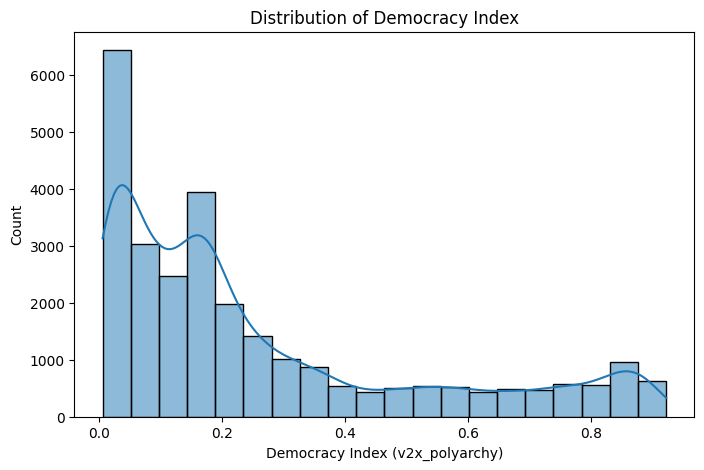

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['v2x_polyarchy'], bins=20, kde=True)
plt.title("Distribution of Democracy Index")
plt.xlabel("Democracy Index (v2x_polyarchy)")
plt.ylabel("Count")
plt.show()


## Trend Over Time

<ipython-input-10-26b4f75c9afe>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='v2x_polyarchy', ci=None)


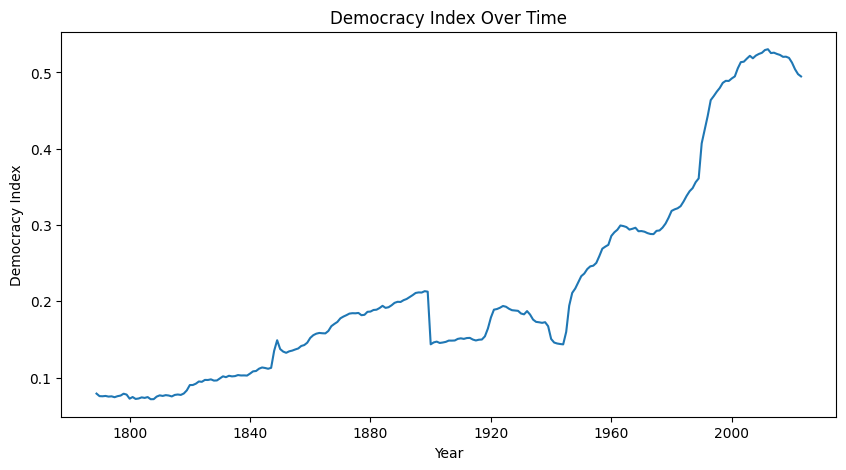

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='v2x_polyarchy', ci=None)
plt.title("Democracy Index Over Time")
plt.xlabel("Year")
plt.ylabel("Democracy Index")
plt.show()


In [ ]:
#list(df.columns)

In [ ]:
dt=df

In [ ]:
list(dt.columns)

['country_name',
 'country_text_id',
 'country_id',
 'year',
 'historical_date',
 'project',
 'historical',
 'histname',
 'codingstart',
 'codingend',
 'codingstart_contemp',
 'codingend_contemp',
 'codingstart_hist',
 'codingend_hist',
 'gap_index',
 'COWcode',
 'v2x_polyarchy',
 'v2x_polyarchy_codelow',
 'v2x_polyarchy_codehigh',
 'v2x_polyarchy_sd',
 'v2x_libdem',
 'v2x_libdem_codelow',
 'v2x_libdem_codehigh',
 'v2x_libdem_sd',
 'v2x_partipdem',
 'v2x_partipdem_codelow',
 'v2x_partipdem_codehigh',
 'v2x_partipdem_sd',
 'v2x_delibdem',
 'v2x_delibdem_codelow',
 'v2x_delibdem_codehigh',
 'v2x_delibdem_sd',
 'v2x_egaldem',
 'v2x_egaldem_codelow',
 'v2x_egaldem_codehigh',
 'v2x_egaldem_sd',
 'v2x_api',
 'v2x_api_codelow',
 'v2x_api_codehigh',
 'v2x_api_sd',
 'v2x_mpi',
 'v2x_mpi_codelow',
 'v2x_mpi_codehigh',
 'v2x_mpi_sd',
 'v2x_freexp_altinf',
 'v2x_freexp_altinf_codelow',
 'v2x_freexp_altinf_codehigh',
 'v2x_freexp_altinf_sd',
 'v2x_frassoc_thick',
 'v2x_frassoc_thick_codelow',
 'v2x

Question 1b

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Liberal/liberal 2/V-Dem-CY-Full+Others-v14.csv')
dt=df

<ipython-input-14-342bf5925d70>:1: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/drive/MyDrive/Liberal/liberal 2/V-Dem-CY-Full+Others-v14.csv')


In [ ]:
# Calculate indicator sums (more efficient method)
indicator_columns = ['v2elgvsuflvl', 'v2eldonate', 'v2elpubfin', 'v2elembcap',
                     'v2elmulpar', 'v2elvotbuy', 'v2elirreg']




In [ ]:
indicator_sums = dt[indicator_columns].sum()
total_sum = indicator_sums.sum()
print("Indicator Sums:")
indicator_sums

Indicator Sums:


,0
v2elgvsuflvl,26202.000
v2eldonate,-24239.338
v2elpubfin,-28456.524
v2elembcap,-7062.804
v2elmulpar,-737.002
v2elvotbuy,108.440
v2elirreg,54.180


In [ ]:
weights = indicator_sums / total_sum
weights = round(weights, 2)
print("Weights based on the sum of each indicator:")
weights


Weights based on the sum of each indicator:


,0
v2elgvsuflvl,-0.77
v2eldonate,0.71
v2elpubfin,0.83
v2elembcap,0.21
v2elmulpar,0.02
v2elvotbuy,-0.00
v2elirreg,-0.00


In [ ]:
#Weighted Average Calculation
dt['weighted_average'] = 0
for col, weight in zip(indicator_columns, weights):
    dt['weighted_average'] += dt[col] * weight

print("\nFirst few rows of the dataframe with the weighted average column:")
dt


First few rows of the dataframe with the weighted average column:


,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts,weighted_average
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27729,Piedmont-Sardinia,SPD,373,1857,1857-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27730,Piedmont-Sardinia,SPD,373,1858,1858-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27731,Piedmont-Sardinia,SPD,373,1859,1859-12-31,1,1,Kingdom of Piedmont-Sardinia [incorporates Lom...,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27732,Piedmont-Sardinia,SPD,373,1860,1860-12-31,1,1,NaN,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Question 2

In [ ]:
!pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.8/239.8 kB 17.1 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import pycountry_convert as pc

Question 2a

In [ ]:
# Function to get continent code from country name
def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_code
    except KeyError:
        # Handle cases where country name is not found, including 'Zanzibar'
        if country_name == "Zanzibar":
            return "AF"  # Assign Zanzibar to Africa
        return 'Unknown'

In [ ]:
# Apply the get_continent function to get the continent information
dt['continent'] = dt['country_name'].apply(get_continent)
#['v2elgvsuflvl', 'v2eldonate', 'v2elpubfin', 'v2elembcap', 'v2elmulpar', 'v2elvotbuy', 'v2elirreg']
# Filter for African countries
africa_countries = dt[dt['continent'] == 'AF'].copy()

africa_countries.loc[:, 'v2elgvsuflvl'] = africa_countries['v2elgvsuflvl'] / 4
africa_countries.loc[:, 'v2elgvsuflvl'] = africa_countries['v2elgvsuflvl']

africa_countries.loc[:, 'v2eldonate'] = africa_countries['v2eldonate'] / 4
africa_countries.loc[:, 'v2eldonate'] = africa_countries['v2eldonate']

africa_countries.loc[:, 'v2elpubfin'] = africa_countries['v2elpubfin'] / 4
africa_countries.loc[:, 'v2elpubfin'] = africa_countries['v2elpubfin']

africa_countries.loc[:, 'v2elembcap'] = africa_countries['v2elembcap'] / 4
africa_countries.loc[:, 'v2elembcap'] = africa_countries['v2elembcap']

africa_countries.loc[:, 'v2elmulpar'] = africa_countries['v2elmulpar'] / 4
africa_countries.loc[:, 'v2elmulpar'] = africa_countries['v2elmulpar']

africa_countries.loc[:, 'v2elvotbuy'] = africa_countries['v2elvotbuy'] / 4
africa_countries.loc[:, 'v2elvotbuy'] = africa_countries['v2elvotbuy']

africa_countries.loc[:, 'v2elirreg'] = africa_countries['v2elirreg'] / 4
africa_countries.loc[:, 'v2elirreg'] = africa_countries['v2elirreg']

# Define the columns to be used for calculating the weighted average
columns_to_average = indicator_columns
# Calculate the weighted average correctly
africa_countries['weighted_average1'] = africa_countries[columns_to_average].mean(axis=1)
# Drop the 'continent' column
africa_countries = africa_countries.drop(['continent', 'weighted_average'], axis=1)

africa_countries

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts,weighted_average1
820,Ghana,GHA,7,1902,1902-12-31,0,0,Gold Coast Colony [consisting of the coastal r...,1902,2023,...,NaN,NaN,NaN,469.0,1.0,NaN,0.0,NaN,NaN,-0.434167
821,Ghana,GHA,7,1903,1903-12-31,0,0,Gold Coast Colony [consisting of the coastal r...,1902,2023,...,NaN,NaN,NaN,469.0,1.0,NaN,0.0,NaN,NaN,-0.434167
822,Ghana,GHA,7,1904,1904-12-31,0,0,Gold Coast Colony [consisting of the coastal r...,1902,2023,...,NaN,NaN,NaN,468.0,0.0,NaN,0.0,NaN,NaN,-0.434167
823,Ghana,GHA,7,1905,1905-12-31,0,0,Gold Coast Colony [consisting of the coastal r...,1902,2023,...,NaN,NaN,NaN,468.0,0.0,NaN,0.0,NaN,NaN,-0.434167
824,Ghana,GHA,7,1906,1906-12-31,0,0,Gold Coast Colony [consisting of the coastal r...,1902,2023,...,NaN,NaN,NaN,467.0,0.0,NaN,0.0,NaN,NaN,-0.434167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26330,Zanzibar,ZZB,236,2019,2019-12-31,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100125
26331,Zanzibar,ZZB,236,2020,2020-12-31,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158000
26332,Zanzibar,ZZB,236,2021,2021-12-31,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.149000
26333,Zanzibar,ZZB,236,2022,2022-12-31,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.149000


In [ ]:
africa_countries['country_name'].unique()

array(['Ghana', 'South Africa', 'Egypt', 'Mali', 'Senegal', 'South Sudan',
       'Sudan', 'Ethiopia', 'Kenya', 'Nigeria', 'Tanzania', 'Uganda',
       'Benin', 'Burkina Faso', 'Mozambique', 'Niger', 'Zambia',
       'Zimbabwe', 'Guinea', 'Ivory Coast', 'Mauritania', 'Botswana',
       'Burundi', 'Cape Verde', 'Central African Republic', 'Lesotho',
       'Liberia', 'Malawi', 'Morocco', 'Sierra Leone', 'Tunisia',
       'Algeria', 'Angola', 'Cameroon', 'Chad',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Djibouti', 'Eritrea', 'Gabon', 'Guinea-Bissau', 'Libya',
       'Madagascar', 'Namibia', 'Rwanda', 'Somalia', 'Eswatini', 'Togo',
       'Somaliland', 'Comoros', 'Equatorial Guinea', 'Mauritius',
       'Sao Tome and Principe', 'Seychelles', 'Zanzibar'], dtype=object)

In [ ]:
africa_countries_2023 = africa_countries[africa_countries['year'] == 2023]

# Now africa_countries_2023 contains only the data for the year 2023
africa_countries_2023

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts,weighted_average1
941,Ghana,GHA,7,2023,2023-12-31,0,0,Republic of Ghana,1902,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071708
1065,South Africa,ZAF,8,2023,2023-12-31,0,0,Republic of South Africa,1900,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224708
2117,Egypt,EGY,13,2023,2023-12-31,0,1,Arab Republic of Egypt,1789,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101929
4468,Mali,MLI,28,2023,2023-12-31,0,0,Republic of Mali,1900,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.065167
4900,Senegal,SEN,31,2023,2023-12-31,0,0,Republic of Senegal,1904,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025458
4913,South Sudan,SSD,32,2023,2023-12-31,0,0,Republic of South Sudan [independent state],2011,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.413500
5037,Sudan,SDN,33,2023,2023-12-31,0,0,Republic of the Sudan [independent state],1900,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.144000
5995,Ethiopia,ETH,38,2023,2023-12-31,0,1,Federal Democratic Republic of Ethiopia,1789,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124125
6354,Kenya,KEN,40,2023,2023-12-31,0,0,Republic of Kenya [independent state],1900,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151417
6909,Nigeria,NGA,45,2023,2023-12-31,0,0,Federal Republic of Nigeria [independent state],1914,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240500


In [ ]:
# The choropleth map
fig = px.choropleth(africa_countries_2023,
                    locations="country_name",  # Use country_name for locations
                    locationmode='country names', # Specify the locationmode
                    color="weighted_average1",  # Use the weighted average for color
                    hover_name="country_name",  # Show country name on hover
                    color_continuous_scale="Viridis",
                    title="Weighted Average of Health Policy Deliberation Among the Political Elite in African Countries (2023)",
                    labels={'weighted_average':'Weighted Average of Health Policy Deliberation'}
                   )

fig.update_geos(fitbounds="locations", visible=False) # Fit map to locations and hide the default map
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))

fig.show()

 Question 2 b

In [ ]:
dt['v2exbribe_ord'] = dt['v2exbribe_ord']/4
dt['v2exbribe_ord'] = dt['v2exbribe_ord'] # 1:> No corruption, 0:> corruption
# Select the data for Zanzibar in the year 2023
selected_data = dt[(dt['country_name'] == 'Zanzibar') & (dt['year'] == 2023)]

# Display the result
selected_data[['country_name', 'year', 'v2exbribe_ord']]

,country_name,year,v2exbribe_ord
26334,Zanzibar,2023,0.25


Question 2C

In [ ]:
#['v2elgvsuflvl', 'v2eldonate', 'v2elpubfin', 'v2elembcap', 'v2elmulpar', 'v2elvotbuy', 'v2elirreg']
dt['v2elgvsuflvl'] = dt['v2elgvsuflvl']/4
dt['v2elgvsuflvl'] = dt['v2elgvsuflvl'] # 1: No corruption, 0: Corruption
dt['v2eldonate'] = dt['v2eldonate']/4
dt['v2eldonate'] = dt['v2eldonate'] #1: No corruption, 0:Corruption
dt['v2elpubfin'] = dt['v2elpubfin']/4
dt['v2elpubfin'] = dt['v2elpubfin'] #1:No corruption, 0: Corruption
dt['v2elembcap'] = dt['v2elembcap']/4
dt['v2elembcap'] = dt['v2elembcap']# 1:No corruption, 0:Corruption
dt['v2elmulpar'] = dt['v2elmulpar']/4
dt['v2elmulpar'] = dt['v2elmulpar']# 1:No corruption, 0: Corruption.
dt['v2elvotbuy'] = dt['v2elvotbuy']/4
dt['v2elvotbuy'] = dt['v2elvotbuy']# 1:No corruption, 0: corruption
dt['v2elirreg'] = dt['v2elirreg']/4
dt['v2elirreg'] = dt['v2elirreg']# 1:No corruption, 0: corruption

selected_data = dt[(dt['country_name'] == 'Zanzibar') & (dt['year'] == 2020)]
# Display the result
selected_data[['v2elgvsuflvl', 'v2eldonate', 'v2elpubfin', 'v2elembcap', 'v2elmulpar', 'v2elvotbuy', 'v2elirreg']]

,v2elgvsuflvl,v2eldonate,v2elpubfin,v2elembcap,v2elmulpar,v2elvotbuy,v2elirreg
26331,2.0,0.123,-0.014,-0.18,-0.034,-0.176,-0.613


Question 3

In [ ]:
# List of countries
countries = ['Zanzibar', 'Tanzania', 'India', 'France', 'United States of America']

# Filter the dataframe to include only the specified countries
filtered_dt = dt[dt['country_name'].isin(countries)].copy()

# Filter the dataframe to include only years between 2001 and 2023
filtered_dt = filtered_dt[(filtered_dt['year'] >= 2001) & (filtered_dt['year'] <= 2023)]

# Display the filtered dataframe
filtered_dt = filtered_dt.drop(['continent'], axis=1)


In [ ]:
#['v2elgvsuflvl', 'v2eldonate', 'v2elpubfin', 'v2elembcap', 'v2elmulpar', 'v2elvotbuy', 'v2elirreg']
filtered_dt['sum_indicators'] = filtered_dt['v2elgvsuflvl'] + filtered_dt['v2eldonate'] + filtered_dt['v2elpubfin'] + filtered_dt['v2elembcap'] + filtered_dt['v2elmulpar'] + filtered_dt['v2elvotbuy'] + filtered_dt['v2elirreg']

# Calculate weight for each row
filtered_dt.fillna(filtered_dt.median(numeric_only=True), inplace=True)
filtered_dt['weight'] = filtered_dt['sum_indicators'] / 7

# Display the relevant columns
filtered_dt[['country_name','year', 'sum_indicators', 'weight']]

,country_name,year,sum_indicators,weight
3137,United States of America,2001,4.05550,0.579357
3138,United States of America,2002,4.06950,0.581357
3139,United States of America,2003,4.05550,0.579357
3140,United States of America,2004,3.99775,0.571107
3141,United States of America,2005,4.05550,0.579357
...,...,...,...,...
26330,Zanzibar,2019,4.05550,0.579357
26331,Zanzibar,2020,1.10600,0.158000
26332,Zanzibar,2021,4.05550,0.579357
26333,Zanzibar,2022,4.05550,0.579357


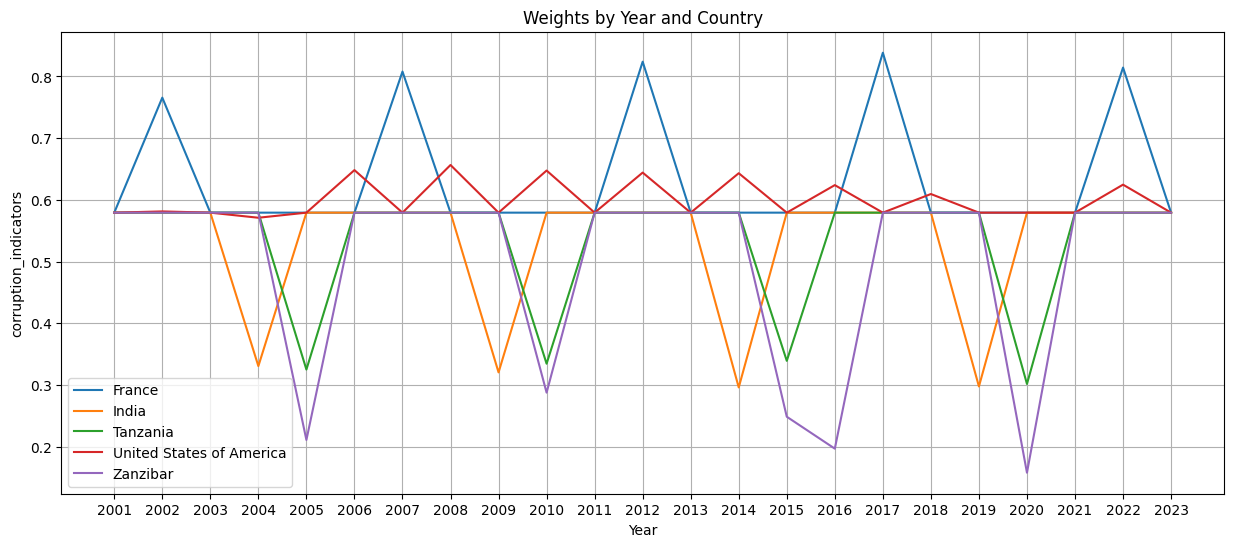

In [ ]:
# Create the line plot
plt.figure(figsize=(15, 6))  # Adjust figure size for better visibility

# Assuming 'filtered_dt' has the 'weight' column
grouped_data = filtered_dt.groupby(['year', 'country_name'])[['weight']].mean().reset_index() # Recalculate grouped_data to include 'weight'

for country in grouped_data['country_name'].unique():
    country_data = grouped_data[grouped_data['country_name'] == country]
    plt.plot(country_data['year'], country_data['weight'], label=country)

plt.xlabel('Year')
plt.ylabel('corruption_indicators')
plt.title('Weights by Year and Country')
plt.xticks(range(2001, 2024))  # Set x-axis ticks to years from 2001 to 2023
plt.legend()
plt.grid(True)
plt.show()

Question: 4

In [ ]:
african_countries = dt[dt['continent'] == 'AF']

# Indicators to use for PCA
indicators = ['v2elgvsuflvl', 'v2eldonate', 'v2elpubfin', 'v2elembcap', 'v2elmulpar', 'v2elvotbuy', 'v2elirreg']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the indicators
scaler = StandardScaler()
X = scaler.fit_transform(african_countries[indicators])

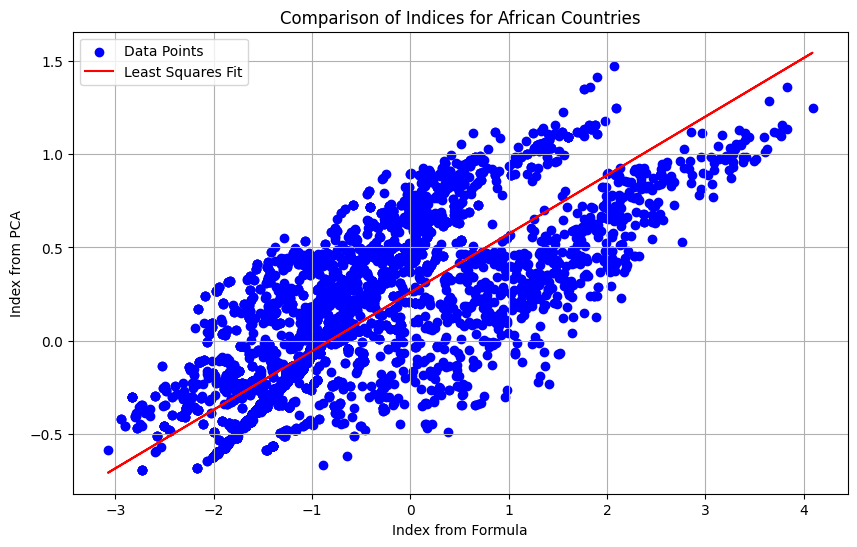

R^2: 0.63


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer on your data and transform it
X = imputer.fit_transform(african_countries[indicators])

# Now you can proceed with PCA
pca = PCA(n_components=1)
pca_index = pca.fit_transform(X).flatten()  # The first principal component



# Calculate existing_index based on the indicator columns
existing_index = african_countries[indicators].sum(axis=1).values

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(existing_index, pca_index, color='blue', label='Data Points')

# Fit a line of least squares
reg = LinearRegression()
reg.fit(existing_index.reshape(-1, 1), pca_index)
predicted = reg.predict(existing_index.reshape(-1, 1))
plt.plot(existing_index, predicted, color='red', label='Least Squares Fit')

# Labels and title
plt.xlabel('Index from Formula')
plt.ylabel('Index from PCA')
plt.title('Comparison of Indices for African Countries')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficient of determination (R^2) to evaluate fit
r_squared = reg.score(existing_index.reshape(-1, 1), pca_index)
print(f'R^2: {r_squared:.2f}')